In [5]:
import pandas as pd
import numpy as np
import librosa
import cv2
import os
import glob
import seaborn as sns
from tqdm import tqdm
import IPython.display
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

import cosine_similarity as cs
import freq_dataset as fd
cos = cs.CosineSimilarity()
freq = fd.MakeFreqDataset()

s_path = "../../sounds/1210/"

In [6]:
# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 한글 사용시 마이너스 폰트가 깨지는 문제가 발생할 수 있으므로 설정 변경
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~')

In [8]:
o_path = list(set(glob.glob(f'{s_path}*/*')))
path_ls = [file[3:] for file in o_path if file.endswith(".mp3") or file.endswith(".wav")]
name_ls = [name.split('/')[-1][:-4] for name in path_ls]
label_ls = [name.split('/')[-3] for name in path_ls]
info_df = pd.DataFrame()
info_df['path'] = path_ls
info_df['label'] = label_ls
info_df['name'] = name_ls
info_df

,path,label,name
0,../sounds/1210\사자\박성영_사자_97.wav,..,1210\사자\박성영_사자_97
1,../sounds/1210\함성\박성영_함성_2.wav,..,1210\함성\박성영_함성_2
2,../sounds/1210\어쿠스틱 드럼\정하은_어쿠스틱 드럼_35.wav,..,1210\어쿠스틱 드럼\정하은_어쿠스틱 드럼_35
3,../sounds/1210\사자\박성영_사자_80.wav,..,1210\사자\박성영_사자_80
4,../sounds/1210\개\정하은_개_67.wav,..,1210\개\정하은_개_67
...,...,...,...
2803,../sounds/1210\새\한승수_새_115.wav,..,1210\새\한승수_새_115
2804,../sounds/1210\함성\정하은_함성_6.wav,..,1210\함성\정하은_함성_6
2805,../sounds/1210\개\정하은_개_66.wav,..,1210\개\정하은_개_66
2806,../sounds/1210\어쿠스틱 드럼\하용우_어쿠스틱드럼_78.wav,..,1210\어쿠스틱 드럼\하용우_어쿠스틱드럼_78


In [17]:
o_df = pd.read_csv("../files/freq_1210.csv", encoding='utf-8-sig')
o_df.drop(["Unnamed: 0"], axis=1, inplace=True)
o_df['cate2'] = [p.split('\\')[-2] for p in o_df['path']]
o_df

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
0,이혜인_개,../../sounds/1210\개\이혜인_개.wav,3.413333,0.209552,0.082520,0.067734,0.008766,1345.629021,1.743878e+06,1012.564115,...,73.831711,-1.725965,19.359303,-1.666280,10.851573,-3.749061,35.335899,3.343437,54.903980,개
1,이혜인_개_1,../../sounds/1210\개\이혜인_개_1.wav,4.096009,0.157872,0.078975,0.068920,0.007029,1637.438824,2.335404e+06,1297.530154,...,74.335373,-0.188571,23.859825,-1.929396,76.791542,5.494885,69.350716,2.064970,111.624191,개
2,이혜인_개_10,../../sounds/1210\개\이혜인_개_10.wav,2.730703,0.201304,0.096732,0.034293,0.001418,1863.324000,1.646391e+06,1540.254029,...,71.331512,-0.301976,27.052343,-1.997501,81.785927,6.282713,73.266998,2.063573,118.021454,개
3,이혜인_개_100,../../sounds/1210\개\이혜인_개_100.wav,2.048027,0.518718,0.074376,0.033353,0.001532,1843.253309,8.797520e+05,1867.425291,...,43.041069,-4.363999,54.756145,-16.362432,98.149170,-20.259165,107.346474,-4.000334,43.494671,개
4,이혜인_개_11,../../sounds/1210\개\이혜인_개_11.wav,20.480000,0.412095,0.091840,0.017488,0.001617,1796.224656,3.070627e+05,2088.752055,...,60.181221,6.723011,45.023262,-1.337765,28.539640,-6.080535,30.198809,-7.868142,32.509842,개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,한승수_함성_94,../../sounds/1210\함성\한승수_함성_94.wav,2.734014,0.276333,0.104020,0.091173,0.007099,2265.420076,1.488722e+06,1573.966764,...,169.572144,3.666092,124.204880,0.268980,175.017349,-7.247454,162.265961,-4.249528,171.163635,함성
2804,한승수_함성_95,../../sounds/1210\함성\한승수_함성_95.wav,8.195374,0.461301,0.072177,0.111878,0.003349,1663.423070,5.803460e+04,1569.766768,...,28.027493,1.073461,19.919594,4.890829,21.652277,-1.994655,13.799182,-2.022395,15.701251,함성
2805,한승수_함성_96,../../sounds/1210\함성\한승수_함성_96.wav,17.752698,0.331042,0.089011,0.069940,0.000884,1770.272584,1.095960e+05,1407.273253,...,90.189072,-7.528919,84.798660,6.785716,95.717369,0.159787,105.510376,3.189420,108.848053,함성
2806,한승수_함성_97,../../sounds/1210\함성\한승수_함성_97.wav,15.022041,0.395882,0.096665,0.063643,0.001408,1995.657457,6.280873e+05,1534.429871,...,62.858734,-5.937887,77.689247,6.698964,83.106979,0.418255,87.038986,5.317280,93.761269,함성


In [9]:
o_df = pd.read_csv("../files/freq_dataset_1113.csv", encoding='utf-8-sig')
o_df.drop(["Unnamed: 0", "label"], axis=1, inplace=True)
o_df['cate1'] = [p.split('/')[-3] for p in o_df['path']]
o_df['cate2'] = [p.split('/')[-1][:3] if p.split('/')[-2] == 'cats_dogs' else p.split('/')[-2] for p in o_df['path']]
o_df.drop(o_df[o_df['cate2']=='cats_dog_add_noise'].index, axis=0, inplace=True)
o_df['cate2'] = [c.replace("cat", "고양이") for c in o_df['cate2']]
o_df['cate2'] = [c.replace("dog", "개") for c in o_df['cate2']]
o_df['cate2'] = [c.replace("까마귀", "새") for c in o_df['cate2']]
o_df['cate2'] = [c.replace(" ", "") for c in o_df['cate2']]
o_df['cate2'] = [c.replace("소리", "") for c in o_df['cate2']]
o_df.drop(o_df[o_df['name']=='2-76868-A-6'].index, axis=0, inplace=True) # 닭 test 음원
o_df.drop(o_df[o_df['name']=='2-95035-A-1'].index, axis=0, inplace=True) # 닭 test 음원
o_df = o_df[o_df['cate1'] == 'animal'].copy()
o_df

FileNotFoundError: [Errno 2] No such file or directory: '../files/freq_dataset_1113.csv'

<BarContainer object of 8 artists>

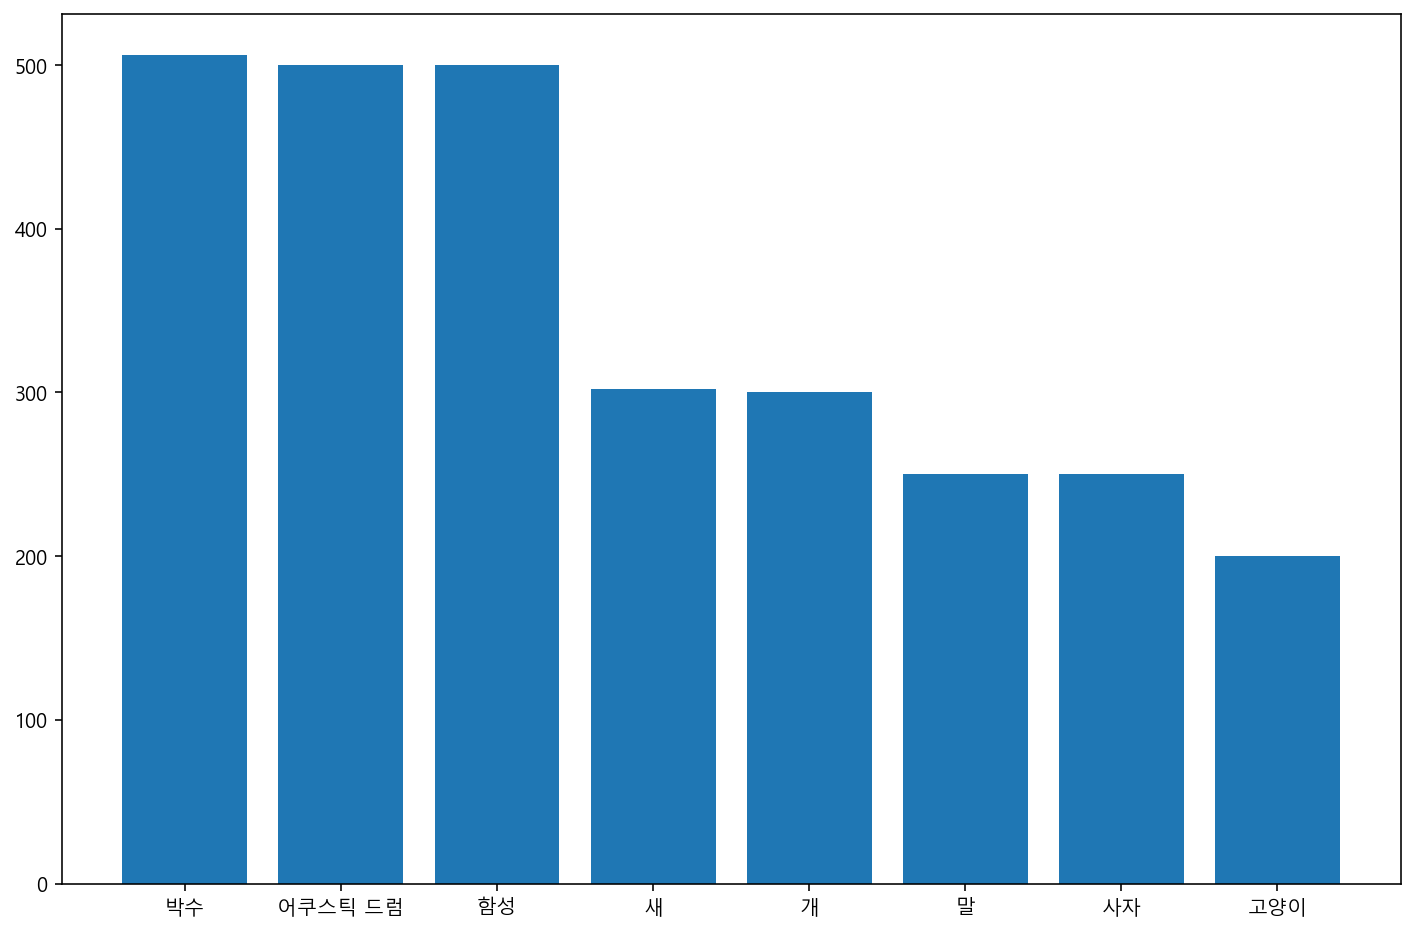

In [18]:
count_df = o_df.groupby('cate2').count().sort_values(by='name', ascending=False)
plt.figure(figsize=(12,8))
plt.bar(count_df.index, height=count_df['name'])

In [20]:
target_animals = np.unique(o_df['cate2']) 
print(target_animals)
result_df = pd.DataFrame()
for a in target_animals:
    temp = o_df[o_df['cate2']== a].copy()
    result_df = pd.concat([result_df, temp])
result_df.reset_index(inplace=True, drop=True)
result_df

['개' '고양이' '말' '박수' '사자' '새' '어쿠스틱 드럼' '함성']


,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
0,이혜인_개,../../sounds/1210\개\이혜인_개.wav,3.413333,0.209552,0.082520,0.067734,0.008766,1345.629021,1.743878e+06,1012.564115,...,73.831711,-1.725965,19.359303,-1.666280,10.851573,-3.749061,35.335899,3.343437,54.903980,개
1,이혜인_개_1,../../sounds/1210\개\이혜인_개_1.wav,4.096009,0.157872,0.078975,0.068920,0.007029,1637.438824,2.335404e+06,1297.530154,...,74.335373,-0.188571,23.859825,-1.929396,76.791542,5.494885,69.350716,2.064970,111.624191,개
2,이혜인_개_10,../../sounds/1210\개\이혜인_개_10.wav,2.730703,0.201304,0.096732,0.034293,0.001418,1863.324000,1.646391e+06,1540.254029,...,71.331512,-0.301976,27.052343,-1.997501,81.785927,6.282713,73.266998,2.063573,118.021454,개
3,이혜인_개_100,../../sounds/1210\개\이혜인_개_100.wav,2.048027,0.518718,0.074376,0.033353,0.001532,1843.253309,8.797520e+05,1867.425291,...,43.041069,-4.363999,54.756145,-16.362432,98.149170,-20.259165,107.346474,-4.000334,43.494671,개
4,이혜인_개_11,../../sounds/1210\개\이혜인_개_11.wav,20.480000,0.412095,0.091840,0.017488,0.001617,1796.224656,3.070627e+05,2088.752055,...,60.181221,6.723011,45.023262,-1.337765,28.539640,-6.080535,30.198809,-7.868142,32.509842,개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,한승수_함성_94,../../sounds/1210\함성\한승수_함성_94.wav,2.734014,0.276333,0.104020,0.091173,0.007099,2265.420076,1.488722e+06,1573.966764,...,169.572144,3.666092,124.204880,0.268980,175.017349,-7.247454,162.265961,-4.249528,171.163635,함성
2804,한승수_함성_95,../../sounds/1210\함성\한승수_함성_95.wav,8.195374,0.461301,0.072177,0.111878,0.003349,1663.423070,5.803460e+04,1569.766768,...,28.027493,1.073461,19.919594,4.890829,21.652277,-1.994655,13.799182,-2.022395,15.701251,함성
2805,한승수_함성_96,../../sounds/1210\함성\한승수_함성_96.wav,17.752698,0.331042,0.089011,0.069940,0.000884,1770.272584,1.095960e+05,1407.273253,...,90.189072,-7.528919,84.798660,6.785716,95.717369,0.159787,105.510376,3.189420,108.848053,함성
2806,한승수_함성_97,../../sounds/1210\함성\한승수_함성_97.wav,15.022041,0.395882,0.096665,0.063643,0.001408,1995.657457,6.280873e+05,1534.429871,...,62.858734,-5.937887,77.689247,6.698964,83.106979,0.418255,87.038986,5.317280,93.761269,함성


In [21]:
result_df['duration'].describe()

count    2808.000000
mean       10.166481
std        18.164721
min         1.365351
25%         5.461361
50%         8.196372
75%        14.336009
max       892.255828
Name: duration, dtype: float64

In [22]:
result_df[result_df['duration']<20].groupby('cate2').count().sort_values(by='name', ascending=False)

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
cate2,,,,,,,,,,,,,,,,,,,,,
박수,495,495,495,495,495,495,495,495,495,495,...,495,495,495,495,495,495,495,495,495,495
함성,475,475,475,475,475,475,475,475,475,475,...,475,475,475,475,475,475,475,475,475,475
어쿠스틱 드럼,465,465,465,465,465,465,465,465,465,465,...,465,465,465,465,465,465,465,465,465,465
새,302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,302
개,286,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
사자,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
말,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
고양이,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188


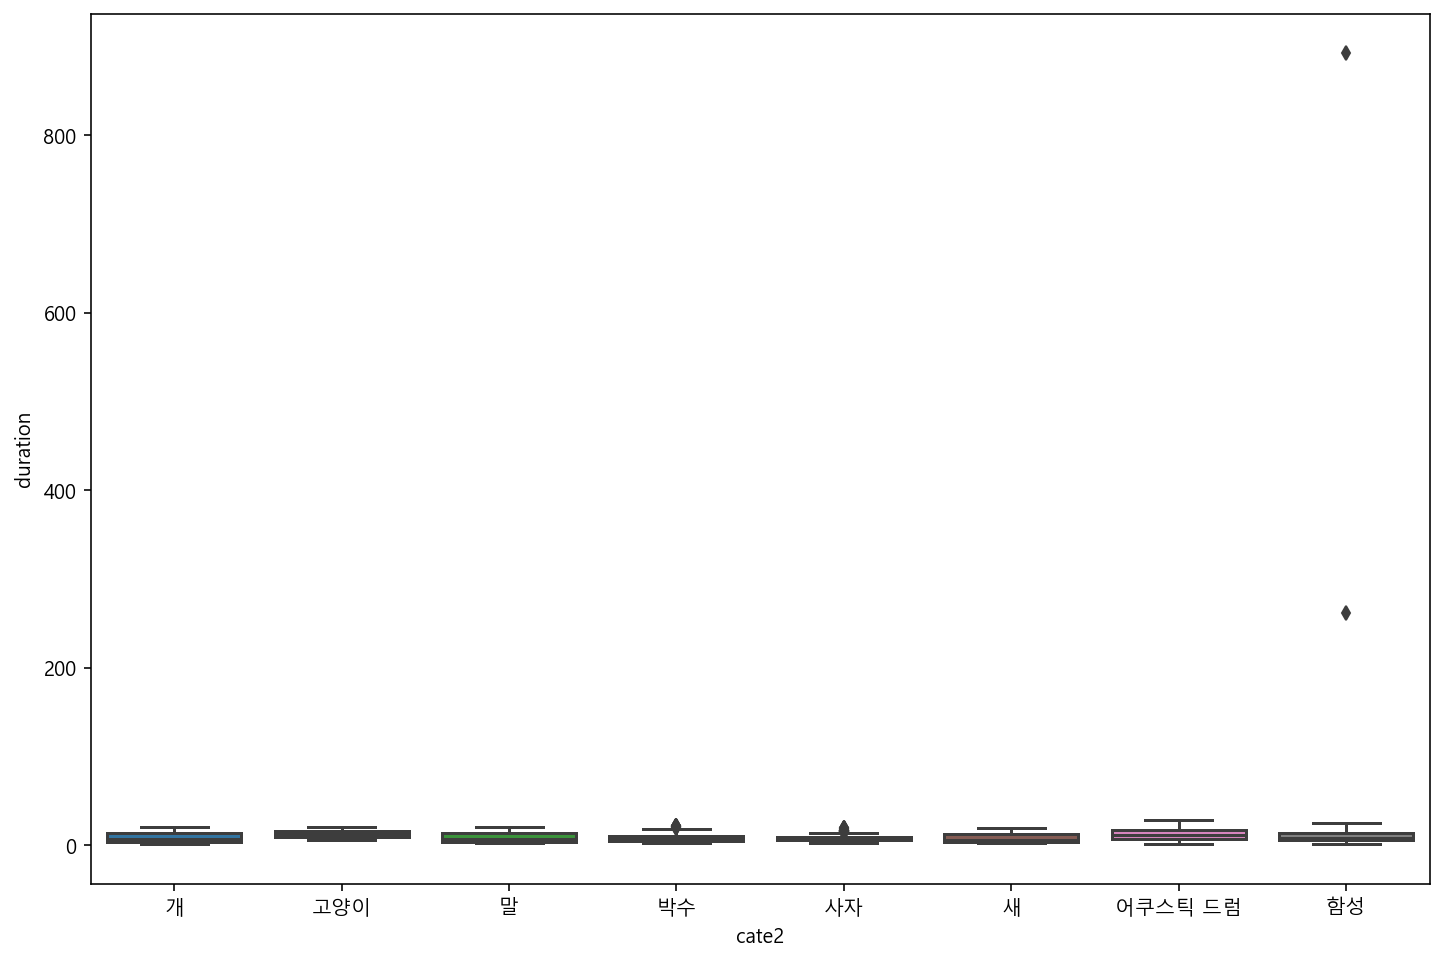

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=result_df, x='cate2', y='duration');

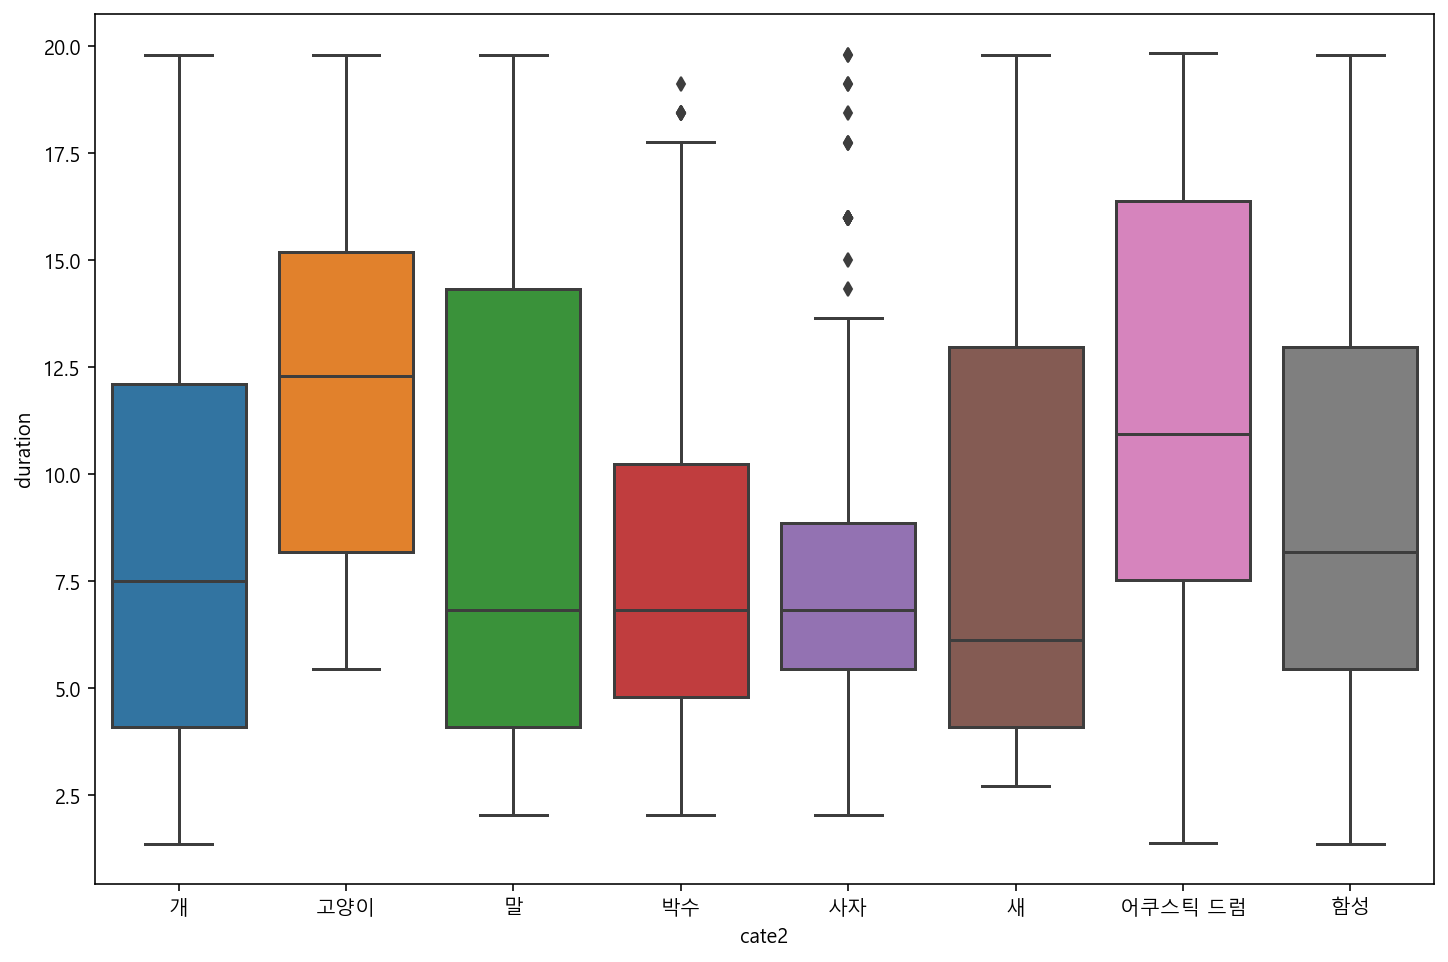

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=result_df[result_df['duration']<20][result_df['duration']>0.7], x='cate2', y='duration');

In [25]:
result_df.groupby('cate2').count()

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
cate2,,,,,,,,,,,,,,,,,,,,,
개,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
고양이,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
말,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
박수,506,506,506,506,506,506,506,506,506,506,...,506,506,506,506,506,506,506,506,506,506
사자,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
새,302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,302
어쿠스틱 드럼,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
함성,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500


In [29]:
long_out = result_df[result_df['duration']>20].index.tolist()
short_out = result_df[result_df['duration']<1].index.tolist()
print("너무 긴 outlier 제외: ", len(long_out))
print("너무 짧은 outlier 제외: ", len(short_out))

너무 긴 outlier 제외:  92
너무 짧은 outlier 제외:  0


In [30]:
result_df[result_df['duration']>20]

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
4,이혜인_개_11,../../sounds/1210\개\이혜인_개_11.wav,20.480000,0.412095,0.091840,0.017488,0.001617,1796.224656,3.070627e+05,2088.752055,...,60.181221,6.723011,45.023262,-1.337765,28.539640,-6.080535,30.198809,-7.868142,32.509842,개
63,이혜인_개_65,../../sounds/1210\개\이혜인_개_65.wav,20.480000,0.409039,0.104468,0.021095,0.002220,2642.666570,1.214938e+06,1874.403989,...,92.912865,0.772751,61.045876,-2.676005,69.727829,-1.580855,79.978516,-2.419518,90.762222,개
67,이혜인_개_69,../../sounds/1210\개\이혜인_개_69.wav,20.480000,0.467018,0.097555,0.004812,0.000147,2868.309461,1.020503e+06,2138.987817,...,56.267002,-2.998256,49.948711,-5.115113,40.389229,-4.452227,49.735813,-5.694041,36.434666,개
71,이혜인_개_72,../../sounds/1210\개\이혜인_개_72.wav,20.480000,0.476634,0.093923,0.016788,0.000579,2255.760820,8.032227e+05,1793.976161,...,68.675644,-6.523035,67.873947,-6.508665,69.855606,-5.963907,47.546089,-5.573852,49.010555,개
78,이혜인_개_79,../../sounds/1210\개\이혜인_개_79.wav,20.480000,0.439528,0.104905,0.019003,0.001837,2511.883178,1.104558e+06,1858.044535,...,101.891121,-0.029827,56.080574,-1.922504,47.130089,-2.107666,85.194168,-3.707090,112.862549,개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,한승수_함성_59,../../sounds/1210\함성\한승수_함성_59.wav,892.255828,0.004535,0.002764,0.001993,0.000416,20.448902,3.854383e+04,15.787617,...,0.433842,-0.062146,0.508023,0.113526,1.403676,0.022244,0.204594,0.071912,0.634271,함성
2785,한승수_함성_78,../../sounds/1210\함성\한승수_함성_78.wav,20.483356,0.451023,0.076631,0.086192,0.000813,2185.225273,1.277819e+05,1566.801733,...,36.633240,-11.230717,43.050182,-3.499657,41.188526,-5.496766,40.663174,-0.938895,48.860344,함성
2789,한승수_함성_81,../../sounds/1210\함성\한승수_함성_81.wav,20.483356,0.305115,0.093576,0.058927,0.000883,1813.531595,1.659050e+05,1782.821884,...,71.494507,-11.825813,70.669998,-0.333270,76.690506,-4.961038,74.529755,0.523934,81.303284,함성
2791,한승수_함성_83,../../sounds/1210\함성\한승수_함성_83.wav,261.471837,0.031810,0.017755,0.011766,0.001517,195.249663,4.153036e+05,159.626767,...,7.288734,0.205171,2.984984,0.003740,2.867727,0.027185,3.216224,-0.012083,3.572614,함성


In [31]:
final_df = result_df.drop(long_out+short_out, axis=0)
final_df

,name,path,duration,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,cate2
0,이혜인_개,../../sounds/1210\개\이혜인_개.wav,3.413333,0.209552,0.082520,0.067734,0.008766,1345.629021,1.743878e+06,1012.564115,...,73.831711,-1.725965,19.359303,-1.666280,10.851573,-3.749061,35.335899,3.343437,54.903980,개
1,이혜인_개_1,../../sounds/1210\개\이혜인_개_1.wav,4.096009,0.157872,0.078975,0.068920,0.007029,1637.438824,2.335404e+06,1297.530154,...,74.335373,-0.188571,23.859825,-1.929396,76.791542,5.494885,69.350716,2.064970,111.624191,개
2,이혜인_개_10,../../sounds/1210\개\이혜인_개_10.wav,2.730703,0.201304,0.096732,0.034293,0.001418,1863.324000,1.646391e+06,1540.254029,...,71.331512,-0.301976,27.052343,-1.997501,81.785927,6.282713,73.266998,2.063573,118.021454,개
3,이혜인_개_100,../../sounds/1210\개\이혜인_개_100.wav,2.048027,0.518718,0.074376,0.033353,0.001532,1843.253309,8.797520e+05,1867.425291,...,43.041069,-4.363999,54.756145,-16.362432,98.149170,-20.259165,107.346474,-4.000334,43.494671,개
5,이혜인_개_12,../../sounds/1210\개\이혜인_개_12.wav,7.509342,0.193408,0.082726,0.036648,0.004779,706.218338,8.266443e+05,735.736515,...,48.287754,1.245441,13.235156,0.370999,16.845463,-1.269931,35.735550,0.177616,20.744318,개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,한승수_함성_94,../../sounds/1210\함성\한승수_함성_94.wav,2.734014,0.276333,0.104020,0.091173,0.007099,2265.420076,1.488722e+06,1573.966764,...,169.572144,3.666092,124.204880,0.268980,175.017349,-7.247454,162.265961,-4.249528,171.163635,함성
2804,한승수_함성_95,../../sounds/1210\함성\한승수_함성_95.wav,8.195374,0.461301,0.072177,0.111878,0.003349,1663.423070,5.803460e+04,1569.766768,...,28.027493,1.073461,19.919594,4.890829,21.652277,-1.994655,13.799182,-2.022395,15.701251,함성
2805,한승수_함성_96,../../sounds/1210\함성\한승수_함성_96.wav,17.752698,0.331042,0.089011,0.069940,0.000884,1770.272584,1.095960e+05,1407.273253,...,90.189072,-7.528919,84.798660,6.785716,95.717369,0.159787,105.510376,3.189420,108.848053,함성
2806,한승수_함성_97,../../sounds/1210\함성\한승수_함성_97.wav,15.022041,0.395882,0.096665,0.063643,0.001408,1995.657457,6.280873e+05,1534.429871,...,62.858734,-5.937887,77.689247,6.698964,83.106979,0.418255,87.038986,5.317280,93.761269,함성


cate2
개          287
고양이        188
말          248
박수         495
사자         250
새          302
어쿠스틱 드럼    465
함성         481
Name: name, dtype: int64


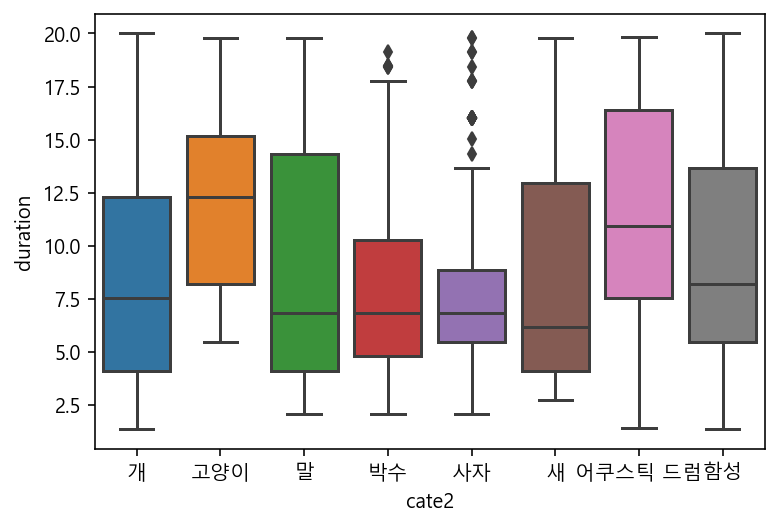

In [32]:
print(final_df.groupby('cate2').count()['name'])
sns.boxplot(data=final_df, x='cate2', y='duration');

---
# 분류

In [33]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import pickle
import joblib
import seaborn as sns

ModuleNotFoundError: No module named 'xgboost'

In [34]:
def play_song(path):
    (file_dir, file_id) = os.path.split(path)
    print(file_id[:-4])
    print(IPython.display.display(IPython.display.Audio(path)))
def play_song_ls(cm_lr_df):
    for idx, path in enumerate(cm_lr_df['path']):
        print(cm_lr_df['pred'].iloc[idx])
        play_song(path)

In [35]:
def make_train_test(df):
    df = df.sample(frac=1)
    X = df.set_index('path').drop(['name','cate1','cate2','duration'], axis=1)
    y = df.set_index('path')[['cate2']].copy()
    print(f"X 개수:{len(X)}, y 개수:{len(y)}")
    print(df.groupby('cate2').count().sort_values('name')[['name']])
    return X, y

In [36]:
def model_fit_kfold(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    print("accuracy:", round(accuracy_score(y_test, y_pred),6))
    print("recall:", round(recall_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
    print("f1 score:", round(f1_score(y_test, y_pred, labels=np.unique(y_test), average='macro'),6))
#     print("Cross Validation Score:", cross_val_score(model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=kfold))
    ax = sns.heatmap(cf, annot=True, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), fmt="d", cmap="Blues")
    plt.title(str(model).split('(')[0])
    plt.show()
    return model, y_pred

In [37]:
def check_false_pred(y_pred):
    cm_lr_df = pd.DataFrame()
    cm_lr_df['answer'] = y_test['cate1'].tolist()
    cm_lr_df['pred'] = y_pred
    cm_lr_df['result'] = cm_lr_df['answer'] == cm_lr_df['pred']
    cm_lr_df['path'] = X_test.index
    cm_lr_df['cate2'] = [result_df[result_df['path']== p]['cate2'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['noise'] = [result_df[result_df['path']== p]['noise'].iloc[0] for p in cm_lr_df['path']]
#     cm_lr_df['name'] = [f"{p.split('/')[-2]}__{p.split('/')[-1][:-4]}" for p in cm_lr_df['path']]
#     [l.split('/')[-1]for l in cm_lr_df['path']]
    cm_lr_df = cm_lr_df[cm_lr_df['result']==False].sort_values(['answer', 'cate2'])
    return cm_lr_df

---
# Total songs

### Test dataset 만들기

In [38]:
count_df = final_df.groupby('cate2').count().sort_values(by='name', ascending=False)['name']
count_df

cate2
박수         495
함성         481
어쿠스틱 드럼    465
새          302
개          287
사자         250
말          248
고양이        188
Name: name, dtype: int64

<BarContainer object of 8 artists>

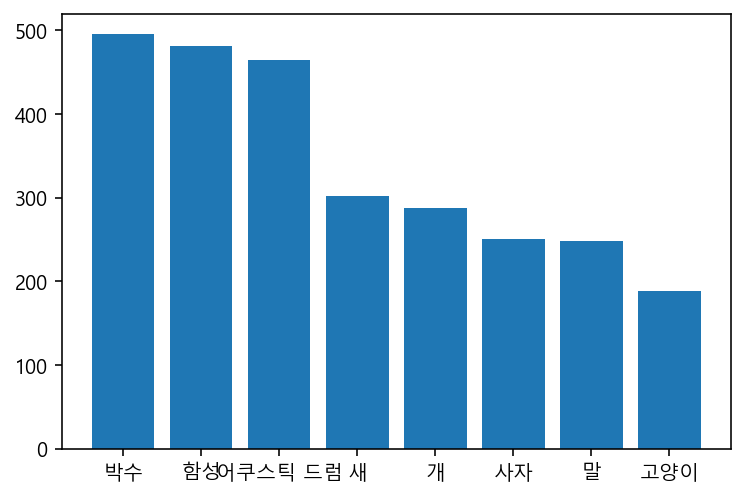

In [39]:
plt.bar(count_df.index, height=count_df)

In [34]:
### random samping으로 라벨별 test 데이터 뽑아두기
test_df = final_df.copy()
test_cat = test_df[test_df['cate2']=='고양이'].sample(n=150, random_state=13)
test_dog = test_df[test_df['cate2']=='개'].sample(n=100, random_state=13)
test_bird = test_df[test_df['cate2']=='새'].sample(n=62, random_state=13)
# test_chicken = test_df[test_df['cate2']=='닭'].sample(n=28, random_state=13)
# test_goat = test_df[test_df['cate2']=='염소'].sample(n=18, random_state=13)
# test_frog = test_df[test_df['cate2']=='개구리'].sample(n=15, random_state=13)
# # test_pig = test_df[test_df['cate2']=='돼지'].sample(n=15, random_state=13)
test_df = pd.concat([test_cat, test_dog, test_bird])
test_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
새,62
개,100
고양이,150


In [35]:
X_test, y_test = make_train_test(test_df)

X 개수:312, y 개수:312
       name
cate2      
새        62
개       100
고양이     150


In [36]:
train_df = result_df.drop(test_df.index, axis=0)
train_df.groupby('cate2').count().sort_values('name')[['name']]

,name
cate2,
새,124
개,183
고양이,253


X 개수:560, y 개수:560
       name
cate2      
새       124
개       183
고양이     253
---------DecisionTreeClassifier---------------
accuracy: 0.855769
recall: 0.856237
f1 score: 0.848125


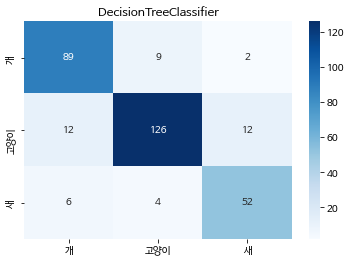

---------XGBClassifier---------------
accuracy: 0.923077
recall: 0.904194
f1 score: 0.911348


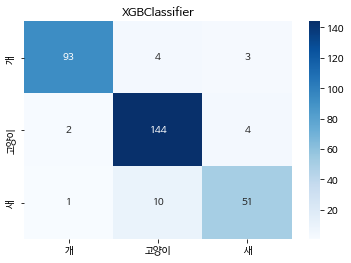

---------RandomForestClassifier---------------
accuracy: 0.891026
recall: 0.879749
f1 score: 0.884318


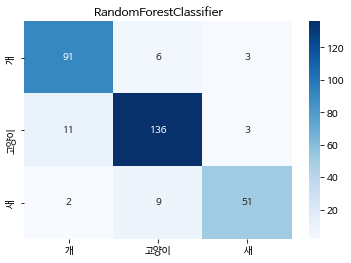

In [37]:
X_train, y_train = make_train_test(train_df)
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.891026
recall: 0.879749
f1 score: 0.884318


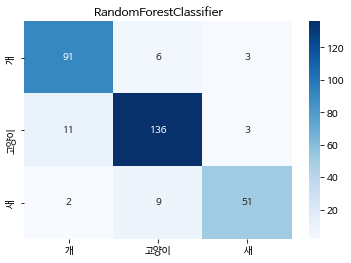

---------XGBClassifier---------------
accuracy: 0.923077
recall: 0.904194
f1 score: 0.911348


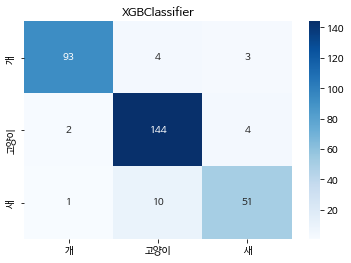

['models/XGB_animal3_1.pkl']

In [38]:
# print("---------DecisionTreeClassifier---------------")
# dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
# # 모델 저장
# joblib.dump(xgb_model, 'models/DTC_animal4_85.pkl')
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_animal3_1.pkl')

print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
# 모델 저장
joblib.dump(xgb_model, 'models/XGB_animal3_1.pkl')

### 2. oversamping - imblearn.ADASYN
- SMOTE에 비해 ADASYN이 조금 더 사실적으로 데이터 간의 분산을 넣어 오버샘플링해준다 함

In [40]:
X_test, y_test = make_train_test(test_df)
train_df = result_df.drop(test_df.index, axis=0)
X_train, y_train = make_train_test(train_df)
X_train, y_train = ADASYN(random_state=13).fit_resample(X_train, y_train) # oversamping
y_train.reset_index().groupby('cate2').count()

X 개수:312, y 개수:312
       name
cate2      
새        62
개       100
고양이     150
X 개수:560, y 개수:560
       name
cate2      
새       124
개       183
고양이     253


,index
cate2,
개,255
고양이,253
새,265


---------DecisionTreeClassifier---------------
accuracy: 0.846154
recall: 0.843082
f1 score: 0.834919


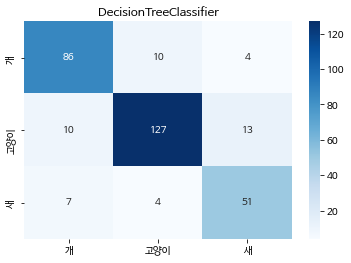

---------XGBClassifier---------------
accuracy: 0.910256
recall: 0.900502
f1 score: 0.900009


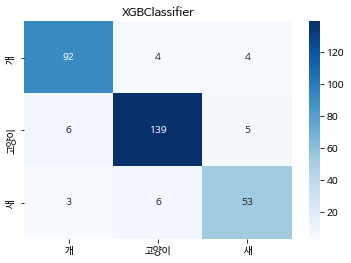

---------RandomForestClassifier---------------
accuracy: 0.916667
recall: 0.910143
f1 score: 0.907263


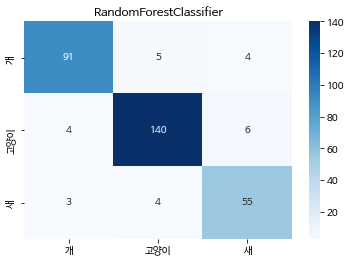

In [41]:
# print("---------LogisticRegression---------------")
# lr_model, lr_y_pred = model_fit_kfold(LogisticRegression())
print("---------DecisionTreeClassifier---------------")
dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=10, random_state=13, oob_score=True))

---------RandomForestClassifier---------------
accuracy: 0.926282
recall: 0.91681
f1 score: 0.917489


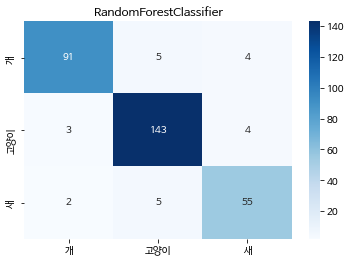

---------XGBClassifier---------------
accuracy: 0.910256
recall: 0.900502
f1 score: 0.900009


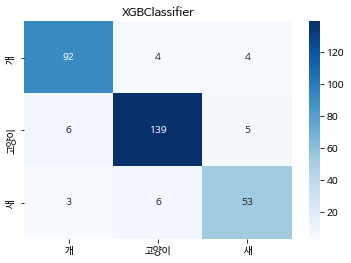

['models/XGB_animal3_1_oversampling.pkl']

In [52]:
# print("---------DecisionTreeClassifier---------------")
# dt_model, dt_y_pred = model_fit_kfold(DecisionTreeClassifier())
# # 모델 저장
# joblib.dump(xgb_model, 'models/DTC_animal4_1.pkl')

print("---------RandomForestClassifier---------------")
rf_model, rf_y_pred = model_fit_kfold(RandomForestClassifier(n_estimators=50, random_state=13, oob_score=True))
# 모델 저장
joblib.dump(rf_model, 'models/RF_animal3_1_oversampling.pkl')

print("---------XGBClassifier---------------")
xgb_model, xgb_y_pred = model_fit_kfold(XGBClassifier(num_class=5,
                                           learning_rate=0.1,
                                           eval_metric='mlogloss'))
# 모델 저장
joblib.dump(xgb_model, 'models/XGB_animal3_1_oversampling.pkl')

---
## 모델 저장하기
- short song
- long song

In [188]:
list(set(glob.glob(f'models/RF_animal6*')))

['models/RF_animal6_under3s_oversampling_83.pkl',
 'models/RF_animal6_over3s_oversampling_75.pkl',
 'models/RF_animal6_80.pkl',
 'models/RF_animal6_under3s_69.pkl']